# Desafio

Prever qual o risco de uma solicitação de cartão de crédito ser fraude.

## Natureza do problema
A detecção de fraude é geralmente considerado como um problema de classificação com dados desbalanceados. Esse desbalanceamento é devido à pequena quantidade de fraudes em relação as operações, que são na grande maioria aprovações.

## Análise Exploratória de Dados

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dicionário de dados

In [2]:
dictionary = pd.read_excel('data/Base de dados.xlsx', sheet_name='DICIONARIO DE DADOS')

In [3]:
dictionary

ID PROPOSTA  \
0         NONO DIGITO DO CPF   
1      PRIMEIRO NOME CLIENTE   
2              IDADE CLIENTE   
3                        CEP   
4                         UF   
5               DDD TELEFONE   
6   ADMINISTRADORA DO CARTAO   
7         BANDEIRA DO CARTAO   
8          FAMILIA DO CARTAO   
9         VARIANTE DO CARTAO   
10          LIMITE DO CARTAO   
11             DOMINIO EMAIL   
12               SCORE EMAIL   
13                 RESULTADO   

   Identificador da proposta (controle interno do sistema)  
0           Nono digito do CPF do cliente cadastrados       
1                              Primeiro no do cliente       
2                                    Idade do cliente       
3       CEP onde o cartão de crédito vai ser entregue       
4                                           UF do CEP       
5   DDD do telefone para contato informado no cada...       
6                 Administradora do cartão de crédito       
7                       Bandeira do cartão de crédito       
8                        Familia do cartão de crédito       
9                       Variante de cartão de crédito       
10                        Limite do cartão de crédito       
11          Dominio do e-mail cadastrado pelo cliente       
12  Probabilidade do e-mail pertencer os CPF cadas...       
13       Resultado da transação (Aprovação ou Fraude)

### Dados históricos

In [3]:
history = pd.read_excel('data/Base de dados.xlsx', sheet_name='HISTORICO', index_col=0)

In [5]:
history.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1794489 to 1540500
Data columns (total 14 columns):
NONO DIGITO DO CPF          20000 non-null int64
PRIMEIRO NOME CLIENTE       20000 non-null object
IDADE CLIENTE               20000 non-null int64
CEP                         20000 non-null object
UF                          20000 non-null object
DDD TELEFONE                20000 non-null int64
ADMINISTRADORA DO CARTAO    20000 non-null object
BANDEIRA DO CARTAO          20000 non-null object
FAMILIA DO CARTAO           20000 non-null object
VARIANTE DO CARTAO          20000 non-null object
LIMITE DO CARTAO            20000 non-null float64
DOMINIO EMAIL               20000 non-null object
SCORE EMAIL                 20000 non-null float64
RESULTADO                   20000 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 2.3+ MB


A coluna que identifica as transações foi definida como índice e será ordenada por esse identificador.

In [4]:
history.sort_index(inplace=True)

In [7]:
history.head()

NONO DIGITO DO CPF PRIMEIRO NOME CLIENTE  IDADE CLIENTE  \
ID PROPOSTA                                                            
1517494                       1                ZILMA              74   
1517498                       4                DAVID              33   
1517549                       3               NATALY              25   
1517553                       3            FRANCISCO              21   
1517556                       8               ELIANA              43   

                   CEP  UF  DDD TELEFONE ADMINISTRADORA DO CARTAO  \
ID PROPOSTA                                                         
1517494      78320-000  MT            66                   ADM 06   
1517498      11435-530  SP            13                   ADM 01   
1517549      64280-000  PI            86                   ADM 05   
1517553      22780-730  RJ            21                   ADM 04   
1517556      05856-070  SP            11                   ADM 04   

            BANDEIRA DO CARTAO FAMILIA DO CARTAO VARIANTE DO CARTAO  \
ID PROPOSTA                                                           
1517494                 BND 02            FML 10             VRT 03   
1517498                 BND 02            FML 15             VRT 03   
1517549                 BND 02            FML 13             VRT 02   
1517553                 BND 02            FML 04             VRT 03   
1517556                 BND 02            FML 09             VRT 03   

             LIMITE DO CARTAO DOMINIO EMAIL  SCORE EMAIL  RESULTADO  
ID PROPOSTA                                                          
1517494                1976.0   HOTMAIL.COM         0.69     Fraude  
1517498                1900.0     GMAIL.COM         0.72  Aprovação  
1517549                5000.0     GMAIL.COM         0.54  Aprovação  
1517553                1500.0     GMAIL.COM         0.61  Aprovação  
1517556                3000.0     GMAIL.COM         0.50  Aprovação

In [8]:
history.tail()

NONO DIGITO DO CPF PRIMEIRO NOME CLIENTE  IDADE CLIENTE  \
ID PROPOSTA                                                            
1815858                       8              EDUARDO              33   
1817030                       1                 JOSE              59   
1817034                       6               CARLOS              41   
1817809                       8               RAFAEL              27   
1818041                       8                MARLI              44   

                   CEP  UF  DDD TELEFONE ADMINISTRADORA DO CARTAO  \
ID PROPOSTA                                                         
1815858      11451-170  SP            13                   ADM 01   
1817030      51020-220  PE            81                   ADM 01   
1817034      33823-640  MG            31                   ADM 04   
1817809      11609-039  SP            11                   ADM 01   
1818041      04929-210  SP            11                   ADM 05   

            BANDEIRA DO CARTAO FAMILIA DO CARTAO VARIANTE DO CARTAO  \
ID PROPOSTA                                                           
1815858                 BND 02            FML 23             VRT 03   
1817030                 BND 02            FML 15             VRT 01   
1817034                 BND 02            FML 09             VRT 03   
1817809                 BND 02            FML 02             VRT 01   
1818041                 BND 02            FML 13             VRT 02   

             LIMITE DO CARTAO DOMINIO EMAIL  SCORE EMAIL  RESULTADO  
ID PROPOSTA                                                          
1815858                2600.0     GMAIL.COM         0.59  Aprovação  
1817030                3000.0     GMAIL.COM         0.64  Aprovação  
1817034                2500.0     GMAIL.COM         0.52  Aprovação  
1817809                2000.0     GMAIL.COM         0.14  Aprovação  
1818041                1537.0     GMAIL.COM         0.39  Aprovação

In [9]:
history.isnull().any()

NONO DIGITO DO CPF          False
PRIMEIRO NOME CLIENTE       False
IDADE CLIENTE               False
CEP                         False
UF                          False
DDD TELEFONE                False
ADMINISTRADORA DO CARTAO    False
BANDEIRA DO CARTAO          False
FAMILIA DO CARTAO           False
VARIANTE DO CARTAO          False
LIMITE DO CARTAO            False
DOMINIO EMAIL               False
SCORE EMAIL                 False
RESULTADO                   False
dtype: bool

Os dados históricos possuem vinte mil transações (linhas) com quartoze informações (colunas) cada.

Não existem dados faltando.

As colunas com dados categóricos, que não apresentam dados numéricos, precisam ser tratadas, se foram ser utilizadas.

### Visualização do resultado das transações

Para verificar o desbalaceamento dos dados vamos visualizar o resultado das transações.

In [5]:
def plot_categorical(data, column, frequency='Frequency', count='Count'):
    """
    Plot a categorical data as counts of observations in each category.
    
    Parameters
    ----------
    data : pandas.DataFrame
        The dataframe with a categorical column.
    column : str
        The name of the categorical column to plot.
    frequency : str
        Label of frequency column.
    count : str
        Label of count column.
    """

    axis_count = sns.countplot(x=column, data=data)
    total = len(data[column])

    # Twin axis of frequency
    axis_frequency = axis_count.twinx()

    # Position of axis, frequency on left and count on right.
    axis_frequency.yaxis.tick_left()
    axis_frequency.yaxis.set_label_position('left')
    axis_frequency.set_ylabel(f'{frequency} (%)')
    axis_frequency.set_ylim(0,100)

    axis_count.yaxis.tick_right()
    axis_count.yaxis.set_label_position('right')
    axis_count.set_ylabel(f'{count}')
    axis_count.set_ylim(0, total)

    # Frequencies on the top of bars
    for patch in axis_count.patches:
        x=patch.get_x() + patch.get_width()/2
        y=patch.get_height()
        text = f'{100*y/total:.1f}%'
        axis_count.text(x, y, text, ha='center', va='bottom')

    # Clean axes
    sns.despine(offset=10, trim=True, right=False)

In [11]:
plot_categorical(data=history, column='RESULTADO', frequency='Frequência', count='Total')

As transações que resultaram em cancelamento não são interessantes para o estudo e podem ser removidas.

In [6]:
history = history[history.RESULTADO != 'Cancelamento']

A coluna de resultados pode ser separada dos demais dados.

In [7]:
results = history.pop('RESULTADO')

## Tratamento dos dados categóricos

Para tratar os dados categóricos pode usar a abordagem do Pandas (mais simples) ou o scikit-learn (mais confusa).

### Pandas
[Pandas - User Guide - Computing indicator / dummy variables](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#computing-indicator-dummy-variables)

[Pandas - API reference - pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)


### scikit-learn
[scikit-learn - Preprocessing data - Encoding categorical features](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)

## Dados espaciais
O CEP é um dado espacial, ou seja, traz informações de localização no espaço.

Para grandes cidades ou capitais, ele traz informação até no nível do logradouro (rua, avenida, etc). Para cidades menores indica somente a cidade.

Esses dados podem ser obtidos utilizando a biblioteca: [pycep-correios](https://pypi.org/project/pycep-correios/), que retorna as informações:
 - bairro,
 - cep,
 - cidade,
 - logradouro,
 - uf (sigla de estados ou distrito federal),
 - complemento (ex: faixa do logradouro, até o número 370)

Detalhes sobre o CEP em: [Estrutura do CEP](http://www.correios.com.br/enviar-e-receber/ferramentas/cep/estrutura-do-cep), composto de Região, Sub-região, Setor, Subsetor, Divisor de Subsetor e Identificadores de Distribuição.

Informações do **censo demográfico** feito pelo IBGE (Instituto Brasileiro de Geografia e Estatística) podem ser utilizados através de um banco de dados geográficos, que com consultas simples, pelo nome da rua por exemplo, disponibilizam os setores censitários com as **informações socioeconomicas** para análise do perfil do solicitante.

Os dados do censo serão tratados em outra oportunidade. Atualmente será tratado como uma variável númerica e na seleção de características será visto sua importância.

In [8]:
zipcodes = history.pop('CEP')

In [9]:
# Convert zipcodes string to integer
cep = zipcodes.apply(lambda row: int(row.replace('-','')))

In [10]:
clients = pd.get_dummies(history['PRIMEIRO NOME CLIENTE'], prefix='CLIENTE')
states = pd.get_dummies(history['UF'], prefix='UF')
administrators = pd.get_dummies(history['ADMINISTRADORA DO CARTAO'], prefix='ADMINISTRADORA')
flags = pd.get_dummies(history['BANDEIRA DO CARTAO'], prefix='BANDEIRA')
families = pd.get_dummies(history['FAMILIA DO CARTAO'], prefix='FAMILIA')
variants = pd.get_dummies(history['VARIANTE DO CARTAO'], prefix='VARIANTE')
domains = pd.get_dummies(history['DOMINIO EMAIL'], prefix='EMAIL')

In [11]:
history.drop(columns=['PRIMEIRO NOME CLIENTE', 'UF', 'ADMINISTRADORA DO CARTAO', 'BANDEIRA DO CARTAO', 'FAMILIA DO CARTAO', 'VARIANTE DO CARTAO', 'DOMINIO EMAIL'], inplace=True)

In [12]:
dataset = pd.concat([history, clients, cep, states, administrators, flags, families, variants, domains], axis='columns')

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19950 entries, 1517494 to 1818041
Columns: 4795 entries, NONO DIGITO DO CPF to EMAIL_ZOHO.COM
dtypes: float64(2), int64(4), uint8(4789)
memory usage: 92.2 MB


## Tratamento dos dados desbalanceados

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.combine import SMOTEENN

In [14]:
dataset_train, dataset_test, results_train, results_test = train_test_split(dataset, results, test_size=0.2, random_state=1)

In [15]:
smote_enn = SMOTEENN(random_state=1)

# Right way to oversample, just the training data
x_train, x_test, y_train, y_test = train_test_split(dataset_train, results_train, test_size=0.2, random_state=1)
dataset_train_resampled, results_train_resampled = smote_enn.fit_sample(x_train, y_train)

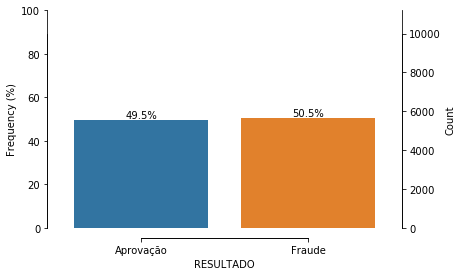

In [42]:
plot_categorical(pd.DataFrame(results_train_resampled, columns=['RESULTADO']), 'RESULTADO')

# Benchmark

Análise da performance de diferentes modelos de classificação.

In [16]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
#from sklearn.neural_network import MLPClassifier

In [17]:
models = {'Random Forest': RandomForestClassifier(),
          'Ada Boost': AdaBoostClassifier(),
          'Gaussian Naive Bayes' : GaussianNB(),
          'Complement Naive Bayes' : ComplementNB(),
          'Decision Tree' : DecisionTreeClassifier()}

In [18]:
def run_models(models, dataset_train, dataset_test, results_train, results_test, normalize='all'):
    """
    Run models.
    
    Training and predicting classification models.
    Show the scores report and confusion matrix for each model.
    
    
    Parameters
    ----------
    models : dict
        Dictionary with the name and the function of models.
    dataset_train : pandas.DataFrame
        The dataframe with the data of features to training.
    dataset : pandas.DataFrame
        The dataframe with the data of features to testing.
    results_train : pandas.Series
        The series with a categorical column of labels to training.
    results_test : pandas.Series
        The series with a categorical column of labels to testing.
    normalize : {‘true’, ‘pred’, ‘all’}, default=None
        Normalizes confusion matrix over the true (rows), predicted (columns) conditions or all the population. If None, confusion matrix will not be normalized.
        See more in: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix
    """
    for name, model in models.items():
        print(f'\n{name}')

        model.fit(dataset_train, results_train)
        predictions = model.predict(dataset_test)

        print(metrics.classification_report(results_test, predictions))
        
        display = metrics.plot_confusion_matrix(model, dataset_test, results_test, cmap=plt.cm.YlGn, normalize=normalize)
        display.ax_.set_title(name)
    


Random Forest
              precision    recall  f1-score   support

   Aprovação       0.92      0.96      0.94      3558
      Fraude       0.52      0.36      0.42       432

    accuracy                           0.90      3990
   macro avg       0.72      0.66      0.68      3990
weighted avg       0.88      0.90      0.89      3990


Ada Boost
              precision    recall  f1-score   support

   Aprovação       0.93      0.93      0.93      3558
      Fraude       0.42      0.44      0.43       432

    accuracy                           0.87      3990
   macro avg       0.68      0.68      0.68      3990
weighted avg       0.88      0.87      0.88      3990


Gradient Boosting
              precision    recall  f1-score   support

   Aprovação       0.93      0.95      0.94      3558
      Fraude       0.49      0.43      0.46       432

    accuracy                           0.89      3990
   macro avg       0.71      0.69      0.70      3990
weighted avg       0.88      

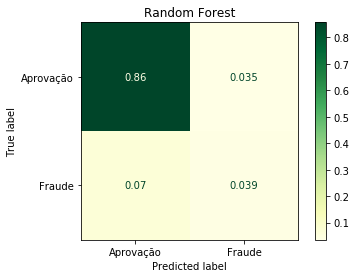

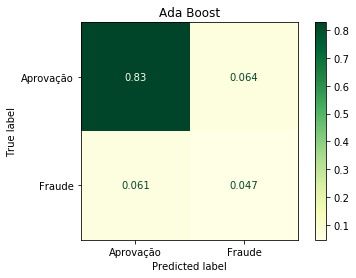

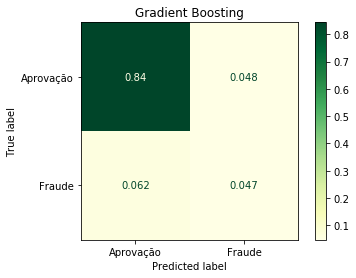

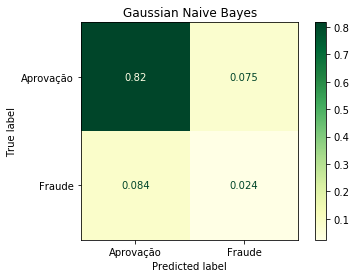

In [51]:
run_models(models, dataset_train_resampled, dataset_test, results_train_resampled, results_test)

In [19]:
def plot_report(data, units, axis=None):
    """
    Plot a report's scores or times.
    
    Parameters
    ----------
    data : pandas.DataFrame
        The dataframe with report's scores or times.
    title : str
        Title of report.
    units : str
        Units name.
    """
    axis = sns.barplot(data = data, ax=axis)
    axis.set_ylabel(units)
    
    # Values on the top of bars
    for patch in axis.patches:
        x = patch.get_x() + patch.get_width()/2
        y = patch.get_height()/2
        value = patch.get_height()
        text = f'{value:.4f}'
        axis.text(x, y, text, ha='center', va='bottom')
    
    sns.despine(offset=10, trim=True)

In [20]:
def benchmark_models(models, dataset, results, scoring=['accuracy', 'balanced_accuracy']):
    """
    Benckmaring of the classification models.
    
    Cross validate with plotting of times and scoring for each model. 
    
    Parameters
    ----------
    models : dict
        Dictionary with the name and the function of models.
    dataset : pandas.DataFrame
        The dataframe with the data of features.
    results : pandas.Series
        The series with a categorical column of labels.
    scoring : list
        Names of scoring parameters.
        See more in: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    """
    #  Cross-validation iterators with stratification, for large imbalance in the distribution of the target classes
    splits = StratifiedShuffleSplit(test_size=0.2)
    
    for name, model in models.items():
        print(name)
        
        validate = cross_validate(model, dataset, results, cv=splits, scoring=scoring)
        
        figure, (axis1, axis2) = plt.subplots(1, 2)
        
        times = pd.DataFrame({'Train time': validate['fit_time'], 'Test time': validate['score_time']})        
        scores = pd.DataFrame({name.replace('_', ' ').capitalize(): validate[f'test_{name}'] for name in scoring})
        
        plot_report(times, 'seconds', axis1)
        plot_report(scores, 'score', axis2)
        
        figure.suptitle(name)
        figure.tight_layout()

Random Forest
Ada Boost
Gradient Boosting
Gaussian Naive Bayes
Complement Naive Bayes
Decision Tree


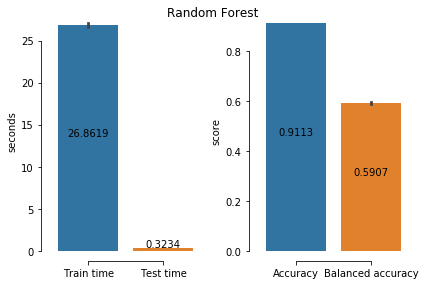

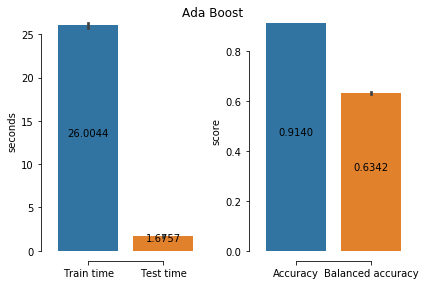

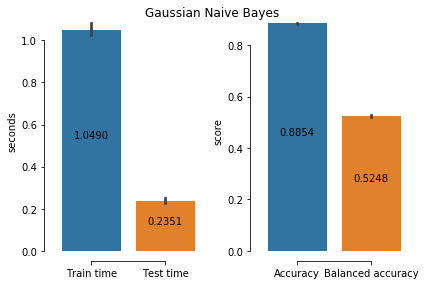

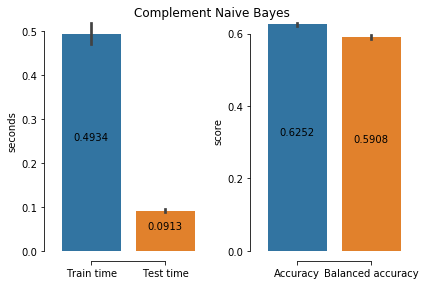

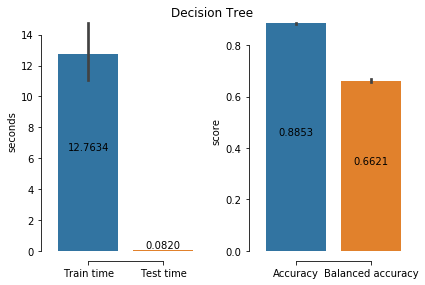

In [61]:
benchmark_models(models, dataset, results)

## Seleção das características mais importantes

In [22]:
def best_features(models, dataset, results, quantity=10, scoring='balanced_accuracy'):
    """
    Show the best features for each model, after model training.
    
    Observation: the Naives Bayes models don't have feature importances attribute.
    
    Parameters
    ----------
    models : dict
        Dictionary with the name and the function of models.
    dataset : pandas.DataFrame
        The dataframe with the data of features.
    results : pandas.Series
        The series with a categorical column of labels.
    quantity : int
        Quantity of best features to show.
    scoring : str, default='balanced_accuracy'
        Name of scoring parameter.
        See more in: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    """
    for name, model in models.items():
        if hasattr(model, 'feature_importances_'):
            print(name)

            model.fit(dataset, results)

            features = pd.Series(model.feature_importances_, index=dataset.columns)
            features.sort_values(ascending=False, inplace=True)
            
            data = features.nlargest(quantity)

            figure = plt.figure()
            sns.barplot(x=data, y=data.index)
            sns.despine(offset=10, trim=True)
            figure.suptitle(name)

Random Forest
Ada Boost
Gradient Boosting


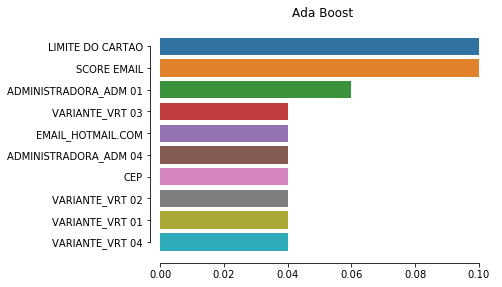

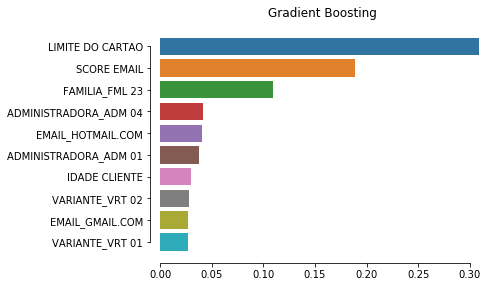

In [148]:
best_features(models, dataset_train_resampled, results_train_resampled)

As colunas LIMITE DO CARTAO, SCORE EMAIL, IDADE CLIENTE, DDD TELEFONE, CEP e algumas colunas *dummies* para ADMINISTRADORA DO CARTAO, VARIANTE DO CARTAO, FAMILIA DO CARTAO e DOMINIO EMAIL apresentam uma boa importância.

## Avaliação dos modelos com as características escolhidas

In [23]:
# To free espace, delete all variables.
%reset Out

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


Flushing output cache (0 entries)


Vamos recarregar os dados históricos e refazer todo o processo com as variáveis selecionadas.

In [24]:
history = pd.read_excel('data/Base de dados.xlsx', sheet_name='HISTORICO', index_col=0)

In [25]:
history.sort_index(inplace=True)

In [26]:
history = history[history.RESULTADO != 'Cancelamento']

In [27]:
results = history.pop('RESULTADO')

### Seleção das colunas

In [189]:
history.columns

Index(['NONO DIGITO DO CPF', 'PRIMEIRO NOME CLIENTE', 'IDADE CLIENTE', 'CEP',
       'UF', 'DDD TELEFONE', 'ADMINISTRADORA DO CARTAO', 'BANDEIRA DO CARTAO',
       'FAMILIA DO CARTAO', 'VARIANTE DO CARTAO', 'LIMITE DO CARTAO',
       'DOMINIO EMAIL', 'SCORE EMAIL'],
      dtype='object')

#### Remoção das colunas que não serão utilizadas

In [28]:
columns_selected = ['IDADE CLIENTE',
                    'CEP',
                    'ADMINISTRADORA DO CARTAO',
                    'FAMILIA DO CARTAO',
                    'VARIANTE DO CARTAO',
                    'LIMITE DO CARTAO',
                    'DOMINIO EMAIL',
                    'SCORE EMAIL']

columns_to_drop = list(set(history.columns) - set(columns_selected))
columns_to_drop

['NONO DIGITO DO CPF',
 'BANDEIRA DO CARTAO',
 'DDD TELEFONE',
 'PRIMEIRO NOME CLIENTE',
 'UF']

In [29]:
history.drop(columns=columns_to_drop, inplace=True)

In [30]:
zipcodes = history.pop('CEP')

In [31]:
# Convert zipcodes string to integer
cep = zipcodes.apply(lambda row: int(row.replace('-','')))

In [32]:
administrators = pd.get_dummies(history['ADMINISTRADORA DO CARTAO'], prefix='ADMINISTRADORA')
families = pd.get_dummies(history['FAMILIA DO CARTAO'], prefix='FAMILIA')
variants = pd.get_dummies(history['VARIANTE DO CARTAO'], prefix='VARIANTE')
domains = pd.get_dummies(history['DOMINIO EMAIL'], prefix='EMAIL')

In [33]:
history.drop(columns=['ADMINISTRADORA DO CARTAO', 'FAMILIA DO CARTAO', 'VARIANTE DO CARTAO', 'DOMINIO EMAIL'], inplace=True)

In [34]:
dataset = pd.concat([history, cep, administrators, families, variants, domains], axis='columns')

## Tratamento dos dados desbalanceados

In [35]:
dataset_train, dataset_test, results_train, results_test = train_test_split(dataset, results, test_size=0.2, random_state=1)

In [36]:
smote_enn = SMOTEENN(random_state=1)

# Right way to oversample, just the training data
x_train, x_test, y_train, y_test = train_test_split(dataset_train, results_train, test_size=0.2, random_state=1)
dataset_train_resampled, results_train_resampled = smote_enn.fit_sample(x_train, y_train)

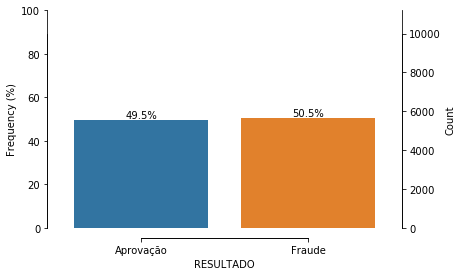

In [199]:
plot_categorical(pd.DataFrame(results_train_resampled, columns=['RESULTADO']), 'RESULTADO')

## Benckmark

In [40]:
models = {'Random Forest': RandomForestClassifier(),
          'Ada Boost': AdaBoostClassifier(),
          'Gaussian Naive Bayes' : GaussianNB(),
          'Complement Naive Bayes' : ComplementNB(),
          'Decision Tree' : DecisionTreeClassifier()}


Random Forest
              precision    recall  f1-score   support

   Aprovação       0.93      0.97      0.95      3558
      Fraude       0.56      0.36      0.44       432

    accuracy                           0.90      3990
   macro avg       0.74      0.66      0.69      3990
weighted avg       0.89      0.90      0.89      3990


Ada Boost
              precision    recall  f1-score   support

   Aprovação       0.93      0.93      0.93      3558
      Fraude       0.43      0.45      0.44       432

    accuracy                           0.88      3990
   macro avg       0.68      0.69      0.68      3990
weighted avg       0.88      0.88      0.88      3990


Gaussian Naive Bayes
              precision    recall  f1-score   support

   Aprovação       0.91      0.92      0.91      3558
      Fraude       0.24      0.22      0.23       432

    accuracy                           0.84      3990
   macro avg       0.57      0.57      0.57      3990
weighted avg       0.83   

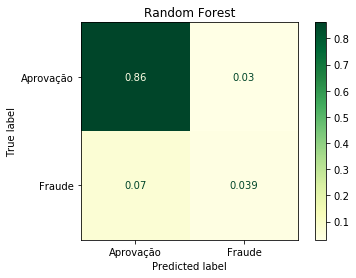

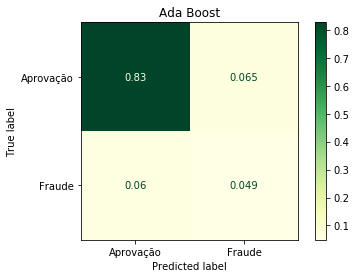

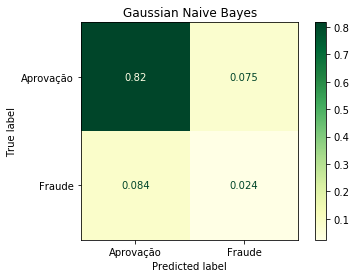

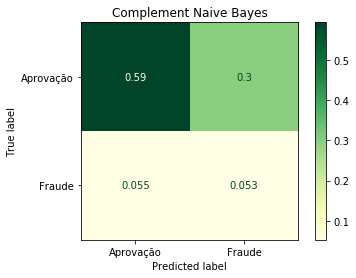

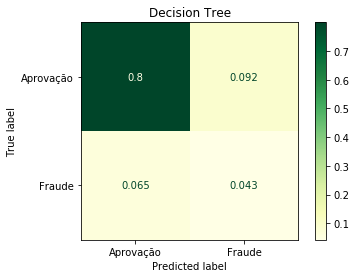

In [41]:
run_models(models, dataset_train_resampled, dataset_test, results_train_resampled, results_test)

Random Forest
Ada Boost
Gaussian Naive Bayes
Complement Naive Bayes
Decision Tree


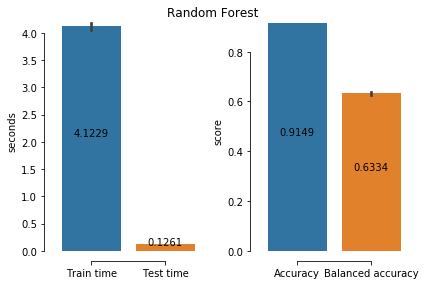

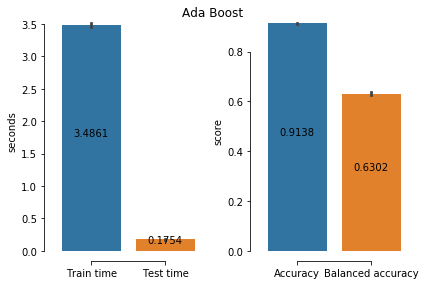

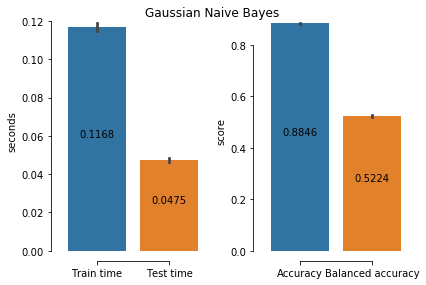

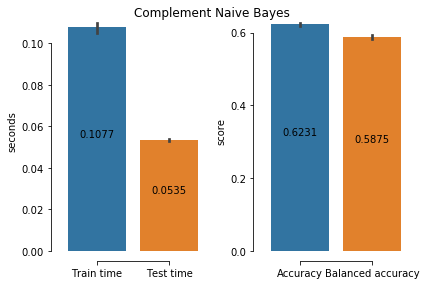

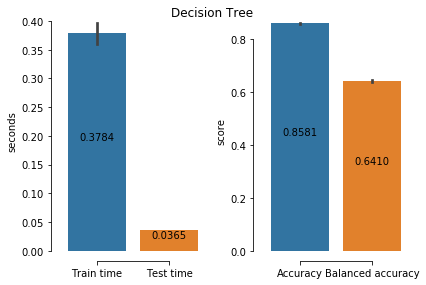

In [202]:
benchmark_models(models, dataset, results)

# Probabilidades

In [42]:
def probability_models(models, dataset, results):
    """
    Probalibility of predictions for each classification models.
    
    
    Parameters
    ----------
    models : dict
        Dictionary with the name and the function of models.
    dataset : pandas.DataFrame
        The dataframe with the data of features.
    results : pandas.Series
        The series with a categorical column of labels.
    """
    columns = list(results.value_counts().index)
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            print(f'\n{name}')
            
            probabilities = pd.DataFrame(model.predict_proba(dataset), columns=columns)
            print(probabilities)

In [235]:
results

ID PROPOSTA
1517494       Fraude
1517498    Aprovação
1517549    Aprovação
1517553    Aprovação
1517556    Aprovação
             ...    
1815858    Aprovação
1817030    Aprovação
1817034    Aprovação
1817809    Aprovação
1818041    Aprovação
Name: RESULTADO, Length: 19950, dtype: object

In [43]:
probabilities = probability_models(models, dataset, results)


Random Forest
       Aprovação  Fraude
0           0.15    0.85
1           0.81    0.19
2           0.96    0.04
3           1.00    0.00
4           0.92    0.08
...          ...     ...
19945       0.90    0.10
19946       0.68    0.32
19947       0.86    0.14
19948       0.99    0.01
19949       0.89    0.11

[19950 rows x 2 columns]

Ada Boost
       Aprovação    Fraude
0       0.497406  0.502594
1       0.507040  0.492960
2       0.506580  0.493420
3       0.510830  0.489170
4       0.511262  0.488738
...          ...       ...
19945   0.515960  0.484040
19946   0.510021  0.489979
19947   0.512415  0.487585
19948   0.514543  0.485457
19949   0.506849  0.493151

[19950 rows x 2 columns]

Gaussian Naive Bayes
       Aprovação    Fraude
0       0.737644  0.262356
1       0.672248  0.327752
2       0.676950  0.323050
3       0.690705  0.309295
4       0.652614  0.347386
...          ...       ...
19945   0.667823  0.332177
19946   0.714035  0.285965
19947   0.701810  0.298190
19948 

## Probabilidade de predição
O modelo *Random Forest* apresentou probabilidades mais coerentes.

In [68]:
model = RandomForestClassifier()
model.fit(dataset_train_resampled, results_train_resampled)
probabilities = pd.DataFrame(model.predict_proba(dataset), index=dataset.index)
frauds = probabilities[1].to_frame(name='PROBABILIDADE')

Probabilidade de predição salva em outro arquivo para evitar corromper os dados históricos.

In [80]:
frauds.to_excel('data/Resultado.xlsx', sheet_name='PREDIÇÃO')